# Exploratory Data Analysis (Sci-Fi and Documentary Genres)

The goal of this section is to perform exploratory data analysis (EDA) on two specific movie genre. This notebook will demonstrate data scraping and acquisition, data cleaning, and code for analysis. Inspiration for the EDA was mainly drawn from code notebook screencast. Additional inspiration was drawn from a GitHub project that sought to classify movie-genres from the movie's respective poster using CNN.

Reference: https://github.com/davideiacobs/-Movie-Genres-Classification-from-their-Poster-Image-using-CNNs

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os
import requests
import numpy 
import matplotlib.pyplot as plt
from skimage import io
import skimage
import os
import scipy.misc
from skimage import data
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
from skimage import io
from scipy import ndimage
from skimage.color import rgb2hsv
import skimage
from PIL import Image
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from PIL import Image
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
%matplotlib inline

# Scraping And Cleaning Data

In this section, I have uploaded the 'MovieGenre.csv' acquired through Kaggle. Before I can upload and retrieve each respective movie poster linked to a specific imdbId, I need to be able to clean the dataset for null values to avoid as many errors loading the posters as possible. After doing so, and removing potential duplicates, I was able to deduce that there are 1921 and 3429 instances of movies containing the genres 'Sci-fi' and 'Documentary' respectively. In this section, I want to account for a randomization of both the scifi and documentary genre. Therefore, I randomized the dataset and took the 1000 instances to perform EDA on.

In [2]:
# Data sourced from Kaggle: https://www.kaggle.com/neha1703/movie-genre-from-its-poster#MovieGenre.csv
path = "../data/MovieGenre.csv"
movies_df = pd.read_csv(path, encoding = "ISO-8859-1")
# movies_df

In [3]:
movies_df = movies_df[movies_df['Genre'].notnull()]
movies_df = movies_df[movies_df['Poster'].notnull()]

movies_df = movies_df[movies_df['IMDB Score'].notnull()]
movies_df = movies_df[movies_df['Title'].notnull()]

movies_df = movies_df[movies_df['Imdb Link'].notnull()]
movies_df = movies_df[movies_df['imdbId'].notnull()]

scifi_df = movies_df[movies_df['Genre'].str.contains('Sci-Fi')]
# scifi_df.shape

doc_df = movies_df[movies_df['Genre'].str.contains('Documentary')]
# doc_df.shape

new_df = pd.concat([scifi_df, doc_df])
# new_df.shape

new_df.drop_duplicates(subset ="imdbId", keep = False, inplace = True) 

from sklearn.utils import shuffle
new_df = shuffle(new_df) #shuffle rows for randomization

In [4]:
def retrieve_poster(ids, urls, data_path, num_imgs):
    i = 0
    while len(os.listdir(data_path)) != num_imgs:
        try:
            urlretrieve(urls[i], data_path + str(ids[i]) + ".jpg")
        except Exception as e:
            pass
        i += 1

In [5]:
# DO NOT RUN AGAIN TO RE-RETRIEVE THE POSTERS

# ids = movies_df["imdbId"]
# urls = movies_df["Poster"]
# data_path = "../data/posters/"
# retrieve_poster(ids, urls, data_path, 1000)

In [6]:
# removes all posters folder created if needed

# import shutil
# shutil.rmtree("../data/posters")

In [7]:
# DO NOT RUN AGAIN TO RE-RETRIEVE THE POSTERS

# scifi_df_copy = scifi_df.copy()
# scifi_df_copy.drop_duplicates(subset ="imdbId", keep = False, inplace = True) 
# scifi_ids = scifi_df_copy["imdbId"]
# scifi_urls = scifi_df_copy["Poster"]
# scifi_data_path = "../data/posters_scifi/"
# retrieve_poster(scifi_ids, scifi_urls, scifi_data_path, len(scifi_ids))

# # note that there are faulty images, and the true lendge of scifi_ids will not complete

In [8]:
# DO NOT RUN AGAIN TO RE-RETRIEVE THE POSTERS

# doc_df_copy = doc_df.copy()
# doc_df_copy.drop_duplicates(subset ="imdbId", keep = False, inplace = True) 
# doc_ids = doc_df_copy["imdbId"]
# doc_urls = doc_df_copy["Poster"]
# doc_data_path = "../data/posters_doc/"
# retrieve_poster(doc_ids, doc_urls, doc_data_path, len(doc_ids))

# # note that there are faulty images, and the true lendge of doc_ids will not complete

# EDA on Sci-Fi and Documentary movies together (1000 randomized instances)

In this section, I aim to see how a randomized sample of 1000 instances of both Sci-Fi and Documentary genres will mix and intertwine. I want to see if merging and randomizinng these two genres will produce significantly different results compared to a seperated genre analysis.

In [9]:
POSTER_DIR = '../data/posters'

In [10]:
filename = os.listdir(POSTER_DIR)
# filename
len(filename)

1001

In [11]:
def calc_stats(image):
    stat_list = []
    img = os.path.join(POSTER_DIR, image)
    image_arr = io.imread(img)
    shape_stats = image_arr.shape #height, width, channel aka number of color channels
    height = shape_stats[0]
    width = shape_stats[1]
    hsv_img = rgb2hsv(image_arr)
    hue_mean = hsv_img[:, :, 0].mean()
    saturation_mean = hsv_img[:,:, 1].mean()
    value_mean = hsv_img[:, :, 2].mean()
    stat_list.append(width)
    stat_list.append(height)
    stat_list.append(hue_mean)
    stat_list.append(saturation_mean)
    stat_list.append(value_mean)
    return stat_list

In [12]:
df = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
idx = []
for i in filename:
#     print(i)
    try: #     if 'jpg' in i:
        df_stats = calc_stats(i)
        val = pd.Series(df_stats, index = df.columns)
        df = df.append(val, ignore_index=True)
        idx.append(i)
    except:
        pass

In [13]:
df.index = idx
df.head()

,height,width,hue_mean,saturation_mean,value_mean
113362.jpg,182.0,268.0,0.126025,0.534173,0.456809
114369.jpg,182.0,268.0,0.191947,0.683635,0.383809
82846.jpg,182.0,268.0,0.120158,0.126902,0.720682
100840.jpg,182.0,268.0,0.560161,0.395465,0.587243
114681.jpg,182.0,268.0,0.592514,0.686291,0.398739


In [14]:
df.shape

(999, 5)

<function matplotlib.pyplot.show(*args, **kw)>

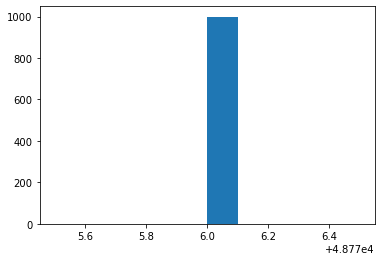

In [15]:
# histogram of image resolutions

resolution = (df['height']*df['width']).values #resolution is equivalent to pixelcount
# resolution
plt.hist(resolution)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

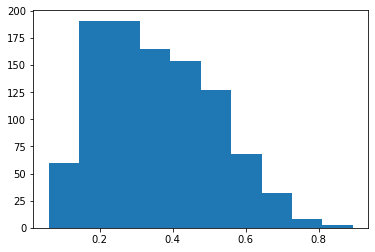

In [16]:
# mean hue histogram

hue = df['hue_mean'].values
# hue
plt.hist(hue)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

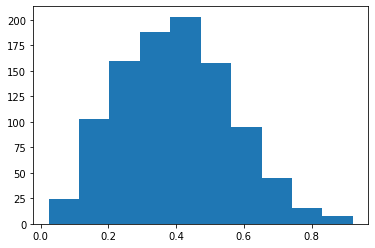

In [17]:
# mean saturation histogram
saturation = df['saturation_mean'].values
# saturation
plt.hist(saturation)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

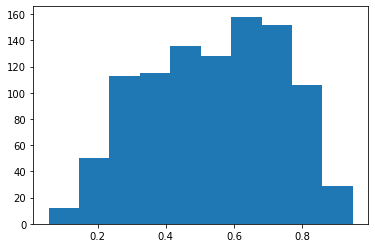

In [18]:
# mean value histogram
value = df['value_mean'].values
# value
plt.hist(value)
plt.show

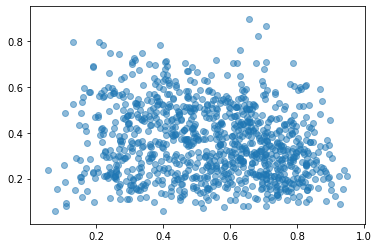

In [19]:
# scatter plot of mean_value (X) against mean_hue (Y)
x = df['value_mean'].values
y = df['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

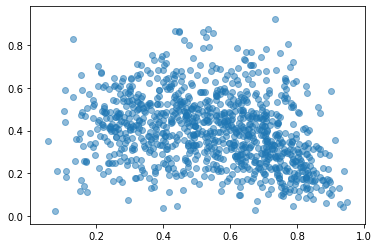

In [20]:
# scatter plot of mean_value (X) against mean_saturation (Y)
x = df['value_mean'].values
y = df['saturation_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

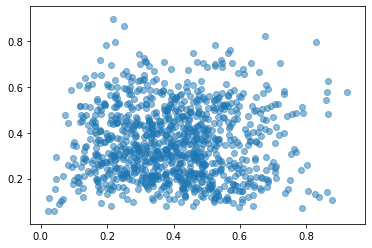

In [21]:
# scatter plot of mean_saturation (X) against mean_hue (Y)
x = df['saturation_mean'].values
y = df['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

In [22]:
DATA_DIR = '../data/'

In [23]:
def make_thumbnail(filename, imagepath, thumbnail_path):
    path = os.path.join(imagepath, filename)
    img = Image.open(path)
    size = 128, 128 
    img.thumbnail(size)
    img.save(os.path.join(thumbnail_path, filename[:-4]+'_thumb.jpg'))

In [24]:
poster_thumbnails ="poster_thumbnails"
if not os.path.exists(os.path.join(DATA_DIR, poster_thumbnails)):
    os.makedirs(os.path.join(DATA_DIR, poster_thumbnails))

In [25]:
thumbnail_dir = os.path.join(DATA_DIR, poster_thumbnails)
thumbnail_dir

'../data/poster_thumbnails'

In [26]:
for i in idx:
    make_thumbnail(i, POSTER_DIR, thumbnail_dir)

In [27]:
POSTER_DIR

'../data/posters'

In [28]:
def thumb_stats(image):
    stat_list = []
    img = os.path.join(thumbnail_dir, image)
    image_arr = io.imread(img)
    shape_stats = image_arr.shape #height, width, channel aka number of color channels
    height = shape_stats[0]
    width = shape_stats[1]
    hsv_img = rgb2hsv(image_arr)
    hue_mean = hsv_img[:, :, 0].mean()
    saturation_mean = hsv_img[:,:, 1].mean()
    value_mean = hsv_img[:, :, 2].mean()
    stat_list.append(width)
    stat_list.append(height)
    stat_list.append(hue_mean)
    stat_list.append(saturation_mean)
    stat_list.append(value_mean)
    return stat_list

In [29]:
df_thumb = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
for i in os.listdir(thumbnail_dir):
#     print(i)
    df_thumb_stats = thumb_stats(i)
    val_thumb = pd.Series(df_thumb_stats, index = df_thumb.columns)
    df_thumb = df_thumb.append(val_thumb, ignore_index=True)

In [30]:
df_thumb.index = os.listdir(thumbnail_dir)
df_thumb.head()
#shape is (999, 5)

,height,width,hue_mean,saturation_mean,value_mean
99348_thumb.jpg,87.0,128.0,0.509439,0.396174,0.301684
114069_thumb.jpg,87.0,128.0,0.679478,0.542132,0.307129
117913_thumb.jpg,87.0,128.0,0.542507,0.457602,0.210112
109424_thumb.jpg,87.0,128.0,0.246509,0.504524,0.529831
116191_thumb.jpg,87.0,128.0,0.305649,0.132959,0.878102


In [31]:
thumb_value_means = df_thumb['value_mean']
thumb_hue_means = df_thumb['hue_mean']

In [32]:
results ="results"
if not os.path.exists(os.path.join(POSTER_DIR, results)):
    os.makedirs(os.path.join(POSTER_DIR, results))

In [33]:
# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure1 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords1 = []
for i in df_thumb.index: #range(len(thumb_hue_mean)):
    tup1 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_hue_means.loc[i]*GLOBAL_WIDTH))
    coords1.append(tup1)
    
thumbs1 = list(df_thumb.index)

# iterate over images/coords and draw to image
for i in range(len(coords1)):
    thumb_img1 = Image.open(os.path.join(thumbnail_dir, thumbs1[i]))
    figure1.paste(thumb_img1, coords1[i])
    
figure1.save(os.path.join((os.path.join(POSTER_DIR, results)), "figure1.jpg"))

In [34]:
thumb_value_means = df_thumb['value_mean']
thumb_saturation_means = df_thumb['saturation_mean']

# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure2 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords2 = []
for i in df_thumb.index:
    tup2 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_saturation_means.loc[i]*GLOBAL_WIDTH))
    coords2.append(tup2)
    
thumbs2 = list(df_thumb.index)

# iterate over images/coords and draw to image
for i in range(len(coords2)):
    thumb_img2 = Image.open(os.path.join(thumbnail_dir, thumbs2[i]))
    figure2.paste(thumb_img2, coords2[i])
    
figure2.save(os.path.join((os.path.join(POSTER_DIR, results)), "figure2.jpg"))

Text(0.5, 1.0, 'Image 1')

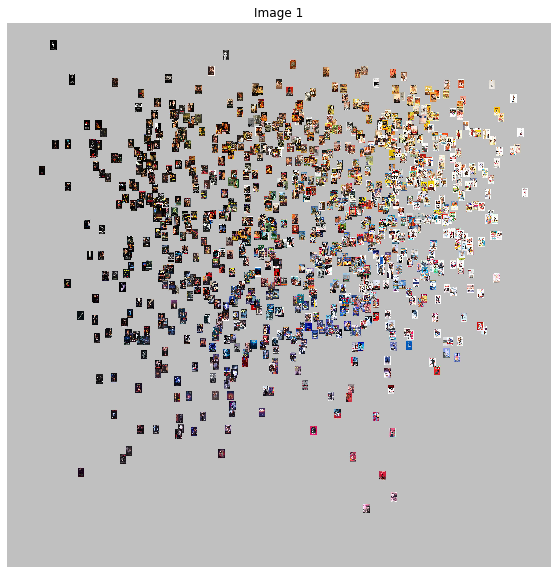

In [35]:
image1 = plt.imread(os.path.join((os.path.join(POSTER_DIR, results)), "figure1.jpg"))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image1)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Image 1")

The bitmap above shows the mean_value versus the mean_hue for the randomized 1000 instances of both Sci-Fi and Documentary movies.

Text(0.5, 1.0, 'Image 2')

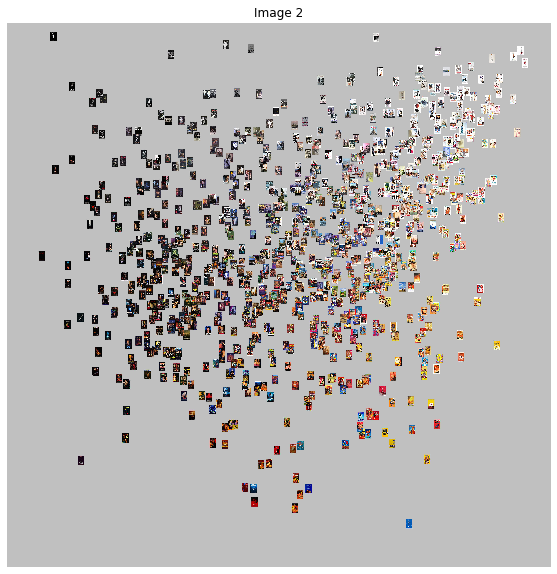

In [36]:
image2 = plt.imread(os.path.join((os.path.join(POSTER_DIR, results)), "figure2.jpg"))

fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(image2)
ax2.axis('off')  # clear x-axis and y-axis
ax2.set_title("Image 2")

The bitmap above shows the mean_value versus the mean_saturation for the randomized 1000 instances of both Sci-Fi and Documentary movies.

# EDA on all valid Documentary movies 

In this section, I aim to perform the same EDA procedures as I did above, however, I want specifically focus on just the Documentary genres to distinguish the differences between these movie's poster attributes versus the poster attributes for Sci-Fi movies. 

In [37]:
POSTER_DOC_DIR = '../data/posters_doc'

In [38]:
filename_doc = os.listdir(POSTER_DOC_DIR)
len(filename_doc)

3395

In [39]:
def calc_stats_doc(image):
    stat_list = []
    img = os.path.join(POSTER_DOC_DIR, image)
    image_arr = io.imread(img)
    shape_stats = image_arr.shape #height, width, channel aka number of color channels
    height = shape_stats[0]
    width = shape_stats[1]
    hsv_img = rgb2hsv(image_arr)
    hue_mean = hsv_img[:, :, 0].mean()
    saturation_mean = hsv_img[:,:, 1].mean()
    value_mean = hsv_img[:, :, 2].mean()
    stat_list.append(width)
    stat_list.append(height)
    stat_list.append(hue_mean)
    stat_list.append(saturation_mean)
    stat_list.append(value_mean)
    return stat_list

In [40]:
df_doc = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
idx_doc = []
for i in filename_doc:
    try: #     if 'jpg' in i:
#         print(i)
        df_stats = calc_stats_doc(i)
        val = pd.Series(df_stats, index = df_doc.columns)
        df_doc = df_doc.append(val, ignore_index=True)
        idx_doc.append(i)
    except:
        pass

In [41]:
df_doc.index = idx_doc
df_doc.head()

,height,width,hue_mean,saturation_mean,value_mean
478338.jpg,182.0,268.0,0.306147,0.723868,0.362230
389448.jpg,182.0,268.0,0.342670,0.169573,0.783071
4537412.jpg,182.0,268.0,0.533187,0.413989,0.439530
470994.jpg,182.0,268.0,0.491463,0.624723,0.500228
3103318.jpg,182.0,268.0,0.513776,0.028905,0.707325


In [42]:
df_doc.shape

(3373, 5)

<function matplotlib.pyplot.show(*args, **kw)>

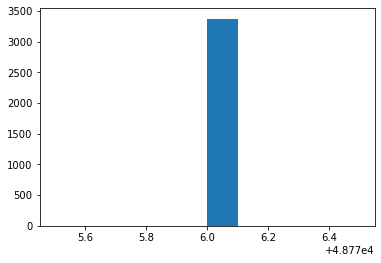

In [43]:
# histogram of image resolutions

resolution = (df_doc['height']*df_doc['width']).values #resolution is equivalent to pixelcount
# resolution
plt.hist(resolution)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

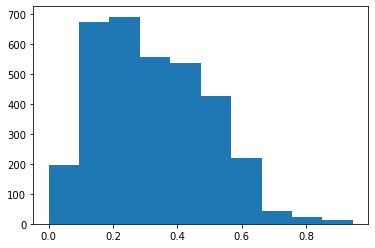

In [44]:
# mean hue histogram

hue = df_doc['hue_mean'].values
# hue
plt.hist(hue)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

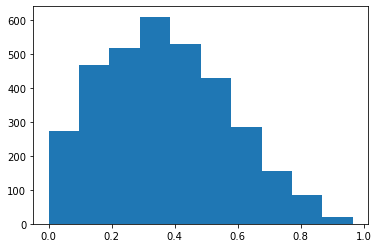

In [45]:
# mean saturation histogram
saturation = df_doc['saturation_mean'].values
# saturation
plt.hist(saturation)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

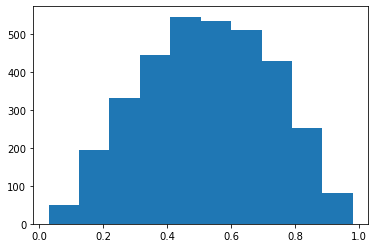

In [46]:
# mean value histogram
value = df_doc['value_mean'].values
# value
plt.hist(value)
plt.show

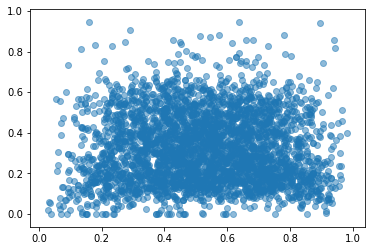

In [47]:
# scatter plot of mean_value (X) against mean_hue (Y)
x = df_doc['value_mean'].values
y = df_doc['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

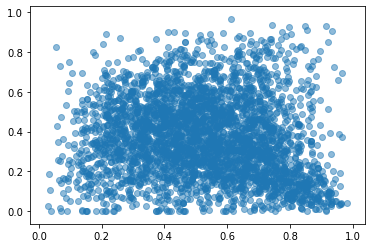

In [48]:
# scatter plot of mean_value (X) against mean_saturation (Y)
x = df_doc['value_mean'].values
y = df_doc['saturation_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

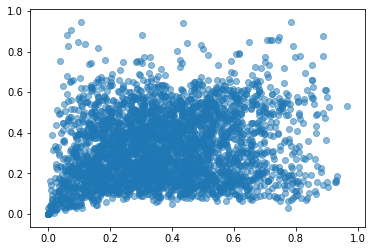

In [49]:
# scatter plot of mean_saturation (X) against mean_hue (Y)
x = df_doc['saturation_mean'].values
y = df_doc['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

In [50]:
doc_thumbnails ="doc_thumbnails"
if not os.path.exists(os.path.join(DATA_DIR, doc_thumbnails)):
    os.makedirs(os.path.join(DATA_DIR, doc_thumbnails))

In [51]:
thumbnail_dir = os.path.join(DATA_DIR, doc_thumbnails)
thumbnail_dir

'../data/doc_thumbnails'

In [52]:
for i in idx_doc:
    make_thumbnail(i, POSTER_DOC_DIR, thumbnail_dir)

In [53]:
df_thumb_doc = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
for i in os.listdir(thumbnail_dir):
#     print(i)
    df_thumb_stats = thumb_stats(i)
    val_thumb = pd.Series(df_thumb_stats, index = df_thumb_doc.columns)
    df_thumb_doc = df_thumb_doc.append(val_thumb, ignore_index=True)

In [54]:
df_thumb_doc.index = os.listdir(thumbnail_dir)
df_thumb_doc.head()
#shape is (3373, 5)

,height,width,hue_mean,saturation_mean,value_mean
3720794_thumb.jpg,87.0,128.0,0.440755,0.425436,0.245257
996396_thumb.jpg,87.0,128.0,0.294720,0.333092,0.211809
95895_thumb.jpg,87.0,128.0,0.148585,0.663923,0.321246
265212_thumb.jpg,87.0,128.0,0.338683,0.513006,0.642085
4935446_thumb.jpg,87.0,128.0,0.097863,0.102487,0.283871


In [55]:
thumb_value_means = df_thumb_doc['value_mean']
thumb_hue_means = df_thumb_doc['hue_mean']

In [56]:
results ="results"
if not os.path.exists(os.path.join(POSTER_DOC_DIR, results)):
    os.makedirs(os.path.join(POSTER_DOC_DIR, results))

In [57]:
# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure1 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords1 = []
for i in df_thumb_doc.index: #range(len(thumb_hue_mean)):
    tup1 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_hue_means.loc[i]*GLOBAL_WIDTH))
    coords1.append(tup1)
    
thumbs1 = list(df_thumb_doc.index)

# iterate over images/coords and draw to image
for i in range(len(coords1)):
    thumb_img1 = Image.open(os.path.join(thumbnail_dir, thumbs1[i]))
    figure1.paste(thumb_img1, coords1[i])
    
figure1.save(os.path.join((os.path.join(POSTER_DOC_DIR, results)), "figure1.jpg"))

In [58]:
thumb_value_means = df_thumb_doc['value_mean']
thumb_saturation_means = df_thumb_doc['saturation_mean']

# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure2 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords2 = []
for i in df_thumb_doc.index:
    tup2 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_saturation_means.loc[i]*GLOBAL_WIDTH))
    coords2.append(tup2)
    
thumbs2 = list(df_thumb_doc.index)

# iterate over images/coords and draw to image
for i in range(len(coords2)):
    thumb_img2 = Image.open(os.path.join(thumbnail_dir, thumbs2[i]))
    figure2.paste(thumb_img2, coords2[i])
    
figure2.save(os.path.join((os.path.join(POSTER_DOC_DIR, results)), "figure2.jpg"))

Text(0.5, 1.0, 'Image 1')

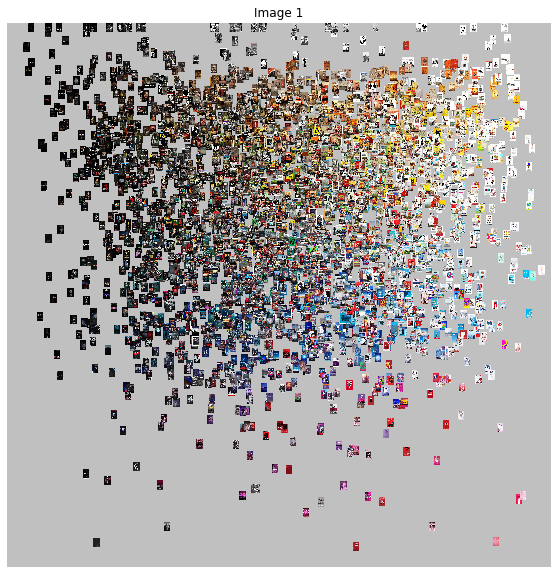

In [59]:
image1 = plt.imread(os.path.join((os.path.join(POSTER_DOC_DIR, results)), "figure1.jpg"))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image1)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Image 1")

The bitmap above shows the mean_value versus the mean_hue for all the valid Documentary genre movies that did not have corrupted movie posters. 

Text(0.5, 1.0, 'Image 2')

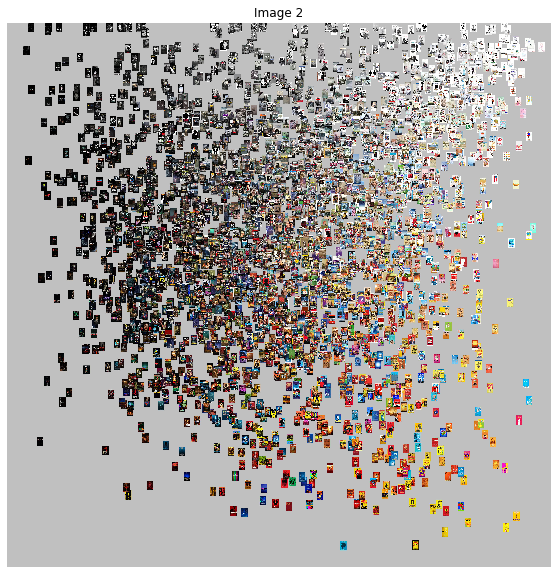

In [60]:
image2 = plt.imread(os.path.join((os.path.join(POSTER_DOC_DIR, results)), "figure2.jpg"))

fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(image2)
ax2.axis('off')  # clear x-axis and y-axis
ax2.set_title("Image 2")

The bitmap above shows the mean_value versus the mean_saturation for all the valid Documentary genre movies that did not have corrupted movie posters. 

# EDA on all valid Sci-Fi movies 

In this section, I aim to perform EDA specifically on just the Sci-Fi genre. The goal is to analyze just Sci-Fi movies and see how they differ to both just Documentary movies and a randomization of Sci-Fi and Documentary movies.

In [61]:
POSTER_SCIFI_DIR = '../data/posters_scifi'

In [62]:
filename_scifi = os.listdir(POSTER_SCIFI_DIR)
len(filename_scifi)

1833

In [63]:
def calc_stats_scifi(image):
    stat_list = []
    img = os.path.join(POSTER_SCIFI_DIR, image)
    image_arr = io.imread(img)
    shape_stats = image_arr.shape #height, width, channel aka number of color channels
    height = shape_stats[0]
    width = shape_stats[1]
    hsv_img = rgb2hsv(image_arr)
    hue_mean = hsv_img[:, :, 0].mean()
    saturation_mean = hsv_img[:,:, 1].mean()
    value_mean = hsv_img[:, :, 2].mean()
    stat_list.append(width)
    stat_list.append(height)
    stat_list.append(hue_mean)
    stat_list.append(saturation_mean)
    stat_list.append(value_mean)
    return stat_list

In [64]:
df_scifi = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
idx_scifi = []
for i in filename_scifi:
    try: #     if 'jpg' in i:
#         print(i)
        df_stats = calc_stats_scifi(i)
        val = pd.Series(df_stats, index = df_scifi.columns)
        df_scifi = df_scifi.append(val, ignore_index=True)
        idx_scifi.append(i)
    except:
        pass

In [65]:
df_scifi.shape

(1827, 5)

<function matplotlib.pyplot.show(*args, **kw)>

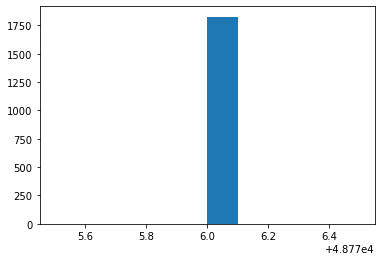

In [66]:
# histogram of image resolutions

resolution = (df_scifi['height']*df_scifi['width']).values #resultion is equivalent to pixelcount
# resolution
plt.hist(resolution)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

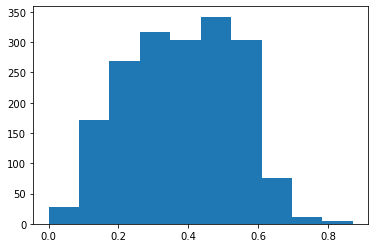

In [67]:
# mean hue histogram

hue = df_scifi['hue_mean'].values
# hue
plt.hist(hue)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

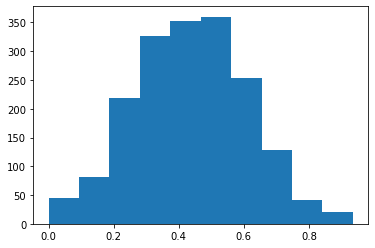

In [68]:
# mean saturation histogram
saturation = df_scifi['saturation_mean'].values
# saturation
plt.hist(saturation)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

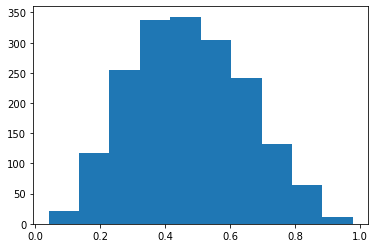

In [69]:
# mean value histogram
value = df_scifi['value_mean'].values
# value
plt.hist(value)
plt.show

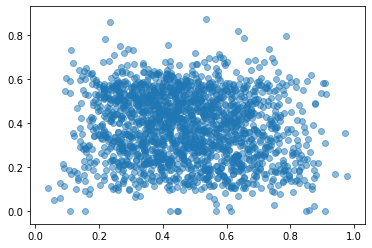

In [70]:
# scatter plot of mean_value (X) against mean_hue (Y)
x = df_scifi['value_mean'].values
y = df_scifi['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

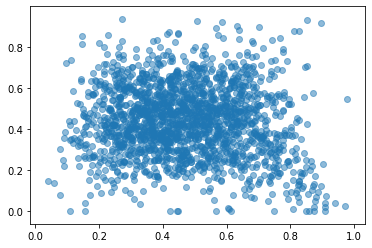

In [71]:
# scatter plot of mean_value (X) against mean_saturation (Y)
x = df_scifi['value_mean'].values
y = df_scifi['saturation_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

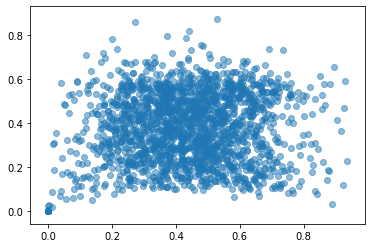

In [72]:
# scatter plot of mean_saturation (X) against mean_hue (Y)
x = df_scifi['saturation_mean'].values
y = df_scifi['hue_mean'].values

plt.scatter(x, y, alpha=0.5)
plt.show()

In [73]:
scifi_thumbnails ="scifi_thumbnails"
if not os.path.exists(os.path.join(DATA_DIR, scifi_thumbnails)):
    os.makedirs(os.path.join(DATA_DIR, scifi_thumbnails))

In [74]:
thumbnail_dir = os.path.join(DATA_DIR, scifi_thumbnails)
thumbnail_dir

'../data/scifi_thumbnails'

In [75]:
for i in idx_scifi:
    make_thumbnail(i, POSTER_SCIFI_DIR, thumbnail_dir)

In [76]:
df_thumb_scifi = pd.DataFrame(columns = ['height', 'width', 'hue_mean', 'saturation_mean', 'value_mean'])
for i in os.listdir(thumbnail_dir):
#     print(i)
    df_thumb_stats = thumb_stats(i)
    val_thumb = pd.Series(df_thumb_stats, index = df_thumb_scifi.columns)
    df_thumb_scifi = df_thumb_scifi.append(val_thumb, ignore_index=True)

In [77]:
df_thumb_scifi.index = os.listdir(thumbnail_dir)
df_thumb_scifi.head()
#shape is (1827, 5)

,height,width,hue_mean,saturation_mean,value_mean
4443784_thumb.jpg,87.0,128.0,0.175632,0.135638,0.194365
66140_thumb.jpg,87.0,128.0,0.000000,0.000000,0.160551
51756_thumb.jpg,87.0,128.0,0.283103,0.527546,0.591998
343818_thumb.jpg,87.0,128.0,0.215123,0.206837,0.091958
2456338_thumb.jpg,87.0,128.0,0.459228,0.844008,0.559563


In [78]:
thumb_value_means = df_thumb_scifi['value_mean']
thumb_hue_means = df_thumb_scifi['hue_mean']

In [79]:
results ="results"
if not os.path.exists(os.path.join(POSTER_SCIFI_DIR, results)):
    os.makedirs(os.path.join(POSTER_SCIFI_DIR, results))

In [80]:
# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure1 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords1 = []
for i in df_thumb_scifi.index: #range(len(thumb_hue_mean)):
    tup1 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_hue_means.loc[i]*GLOBAL_WIDTH))
    coords1.append(tup1)
    
thumbs1 = list(df_thumb_scifi.index)

# iterate over images/coords and draw to image
for i in range(len(coords1)):
    thumb_img1 = Image.open(os.path.join(thumbnail_dir, thumbs1[i]))
    figure1.paste(thumb_img1, coords1[i])
    
figure1.save(os.path.join((os.path.join(POSTER_SCIFI_DIR, results)), "figure1.jpg"))

In [81]:
thumb_value_means = df_thumb_scifi['value_mean']
thumb_saturation_means = df_thumb_scifi['saturation_mean']

# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure2 = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

coords2 = []
for i in df_thumb_scifi.index:
    tup2 = (int(thumb_value_means.loc[i]*GLOBAL_WIDTH), int(thumb_saturation_means.loc[i]*GLOBAL_WIDTH))
    coords2.append(tup2)
    
thumbs2 = list(df_thumb_scifi.index)

# iterate over images/coords and draw to image
for i in range(len(coords2)):
    thumb_img2 = Image.open(os.path.join(thumbnail_dir, thumbs2[i]))
    figure2.paste(thumb_img2, coords2[i])
    
figure2.save(os.path.join((os.path.join(POSTER_SCIFI_DIR, results)), "figure2.jpg"))

Text(0.5, 1.0, 'Image 1')

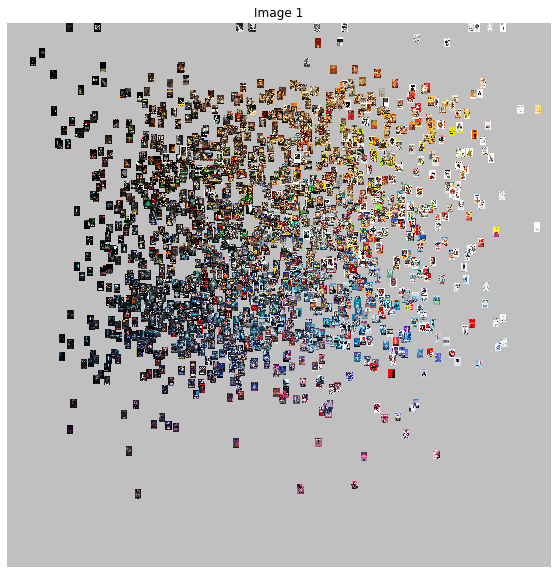

In [82]:
image1 = plt.imread(os.path.join((os.path.join(POSTER_SCIFI_DIR, results)), "figure1.jpg"))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image1)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Image 1")

The bitmap above shows the mean_value versus the mean_hue for all the valid Sci-Fi genre movies that did not have corrupted movie posters. 

Text(0.5, 1.0, 'Image 2')

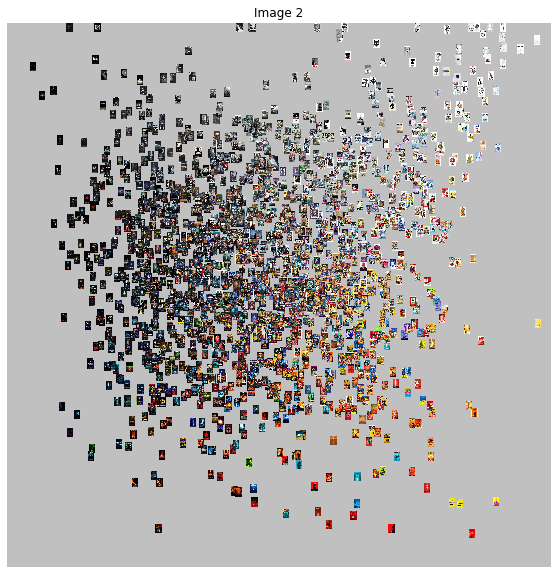

In [83]:
image2 = plt.imread(os.path.join((os.path.join(POSTER_SCIFI_DIR, results)), "figure2.jpg"))

fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(image2)
ax2.axis('off')  # clear x-axis and y-axis
ax2.set_title("Image 2")

The bitmap above shows the mean_value versus the mean_saturation for all the valid Sci-Fi genre movies that did not have corrupted movie posters. 

# Some Data Cleaning for CNN

This section aims to clean the original movies_df into a format that is more easily usable before classifying the movies using their respective posters. Steps that need to be taken here are to make sure that null values are removed and accounted for. In addition, the 'Genre' column would be better served as a list containing all the genres, instead of a string stating all the genres.

In [84]:
movies_df.shape

(39246, 6)

In [85]:
movies_df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [86]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39246 entries, 0 to 40106
Data columns (total 6 columns):
imdbId        39246 non-null int64
Imdb Link     39246 non-null object
Title         39246 non-null object
IMDB Score    39246 non-null float64
Genre         39246 non-null object
Poster        39246 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ MB


In [87]:
def split_genre(string):
    new_str = ''
    if '|' in string:
        new_str = string.split('|')
    return new_str

In [88]:
movies_df_copy = movies_df.copy()

In [89]:
movies_df_copy.shape # this is to check that null values have been removed, which it has in code above

(39246, 6)

In [90]:
movies_df_copy['Genre'] = movies_df_copy['Genre'].apply(split_genre)

In [91]:
movies_df_copy.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,"[Animation, Adventure, Comedy]",https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,"[Action, Adventure, Family]",https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,"[Comedy, Romance]",https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,"[Comedy, Drama, Romance]",https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,"[Comedy, Family, Romance]",https://images-na.ssl-images-amazon.com/images...


In [92]:
# this 'movies_df_copy' dataframe should be clean enough to be able to run CNN on